# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

## Import needed libraries and dataset

In [668]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [669]:
obesity = pd.read_csv("C:\\Users\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\ObesityDataSet_raw_and_data_sinthetic.csv")

In [670]:
print(obesity.shape)
obesity.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Mungling and Cleaning

In [671]:
obesity.isnull().sum(axis=0)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [672]:
obesity['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

## Fit Naive Bayes on training model and predict on testing model

In [673]:
np.random.seed(123)
obesity_randomized = obesity.sample(frac=1)

train_size = round(len(obesity_randomized) * 0.8)
training_set = obesity_randomized[:train_size].reset_index(drop=True)
testing_set = obesity_randomized[train_size:].reset_index(drop=True)

print(training_set.shape)
print(testing_set.shape)

(1689, 17)
(422, 17)


In [674]:
print(type(training_set))
training_set.head()

<class 'pandas.core.frame.DataFrame'>


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,19.010211,1.555431,44.188767,no,no,2.724285,3.000000,Frequently,no,1.000000,yes,1.070331,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
1,Female,25.783865,1.643111,109.910012,yes,yes,3.000000,3.000000,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
2,Male,25.509034,1.772190,114.097656,yes,yes,2.193310,3.000000,Sometimes,no,2.089983,no,1.360994,0.857438,Sometimes,Public_Transportation,Obesity_Type_II
3,Female,33.690239,1.681842,77.426465,yes,yes,3.000000,2.679724,Sometimes,no,1.999737,no,1.747347,0.681773,no,Automobile,Overweight_Level_II
4,Male,24.186273,1.794827,120.919703,yes,yes,2.611847,2.749334,Sometimes,no,2.364849,no,1.141708,0.063005,Sometimes,Public_Transportation,Obesity_Type_II


In [675]:
training_set['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.165187
Obesity_Type_III       0.158674
Obesity_Type_II        0.141504
Overweight_Level_II    0.139728
Normal_Weight          0.133215
Overweight_Level_I     0.132623
Insufficient_Weight    0.129070
Name: proportion, dtype: float64

In [676]:
testing_set['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.170616
Overweight_Level_I     0.156398
Normal_Weight          0.146919
Obesity_Type_II        0.137441
Obesity_Type_III       0.132701
Insufficient_Weight    0.127962
Overweight_Level_II    0.127962
Name: proportion, dtype: float64

## Creating Naive Bayes Model

In [677]:
feature_ls = [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15] #specify indices of features you wanted to include here

trainX_prior = training_set.iloc[:, :-1]

trainX = training_set.iloc[:, feature_ls]
trainy = training_set['NObeyesdad']

colnames = trainX.columns
col_names = trainX_prior.columns

print(trainX_prior.head())
print(trainX.head())
print(trainy.head())


   Gender        Age    Height      Weight family_history_with_overweight  \
0  Female  19.010211  1.555431   44.188767                             no   
1  Female  25.783865  1.643111  109.910012                            yes   
2    Male  25.509034  1.772190  114.097656                            yes   
3  Female  33.690239  1.681842   77.426465                            yes   
4    Male  24.186273  1.794827  120.919703                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
0   no  2.724285  3.000000  Frequently    no  1.000000  yes  1.070331   
1  yes  3.000000  3.000000   Sometimes    no  1.530992   no  0.015860   
2  yes  2.193310  3.000000   Sometimes    no  2.089983   no  1.360994   
3  yes  3.000000  2.679724   Sometimes    no  1.999737   no  1.747347   
4  yes  2.611847  2.749334   Sometimes    no  2.364849   no  1.141708   

        TUE       CALC                 MTRANS  
0  0.000000  Sometimes  Public_Transportation  
1 

In [678]:
testX_prior = testing_set.iloc[:, :-1]
testX = testing_set.iloc[:,feature_ls]
testy = testing_set['NObeyesdad']

print(testX_prior.head())
print(testX.head())
print(testy.head())

   Gender        Age    Height      Weight family_history_with_overweight  \
0  Female  18.947102  1.518917   60.267427                             no   
1  Female  18.000000  1.670058   86.242679                            yes   
2    Male  26.271621  1.660955   90.000000                            yes   
3    Male  18.000000  1.820930  108.742005                            yes   
4  Female  22.667596  1.718939   75.951472                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
0  yes  2.838037  2.737571   Sometimes    no  1.144467  yes  0.753782   
1  yes  2.609123  3.000000   Sometimes    no  1.955053   no  1.186013   
2  yes  2.000000  3.000000   Sometimes    no  3.000000   no  0.669278   
3  yes  2.000000  1.255350   Sometimes    no  2.497065   no  1.000000   
4  yes  2.000000  3.000000  Frequently    no  2.000000   no  0.000000   

        TUE       CALC                 MTRANS  
0  1.286844  Sometimes  Public_Transportation  
1 

In [679]:
testing_set.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18.947102,1.518917,60.267427,no,yes,2.838037,2.737571,Sometimes,no,1.144467,yes,0.753782,1.286844,Sometimes,Public_Transportation,Overweight_Level_I
1,Female,18.000000,1.670058,86.242679,yes,yes,2.609123,3.000000,Sometimes,no,1.955053,no,1.186013,0.000000,no,Public_Transportation,Obesity_Type_I
2,Male,26.271621,1.660955,90.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.669278,0.505266,Sometimes,Automobile,Obesity_Type_I
3,Male,18.000000,1.820930,108.742005,yes,yes,2.000000,1.255350,Sometimes,no,2.497065,no,1.000000,1.441605,no,Public_Transportation,Obesity_Type_I
4,Female,22.667596,1.718939,75.951472,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,0.000000,2.000000,Sometimes,Public_Transportation,Overweight_Level_I


## Encoding and training

In [680]:
le = LabelEncoder()

trainMultinli = le.fit_transform(trainy)
trainMultinli[:10]

testMultinli = le.fit_transform(testy)
testMultinli[:10]

array([5, 2, 2, 2, 5, 2, 2, 1, 5, 0])

In [681]:
enc = OrdinalEncoder()

trainX = enc.fit_transform(trainX)
trainX = pd.DataFrame(trainX, columns=colnames)

testX = enc.fit_transform(testX)
testX = pd.DataFrame(testX, columns=colnames)

trainX_prior = enc.fit_transform(trainX_prior)
trainX_prior = pd.DataFrame(trainX_prior, columns=col_names)

testX_prior = enc.fit_transform(testX_prior)
testX_prior = pd.DataFrame(testX_prior, columns=col_names)


In [682]:
print([.02*i for i in range(1,100)])

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.6400000000000001, 1.6600000000000001, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.8800000000000001, 1.9000000000000001, 1.92, 1.94, 1.96, 1.98]


In [683]:
acc = []
for al in [.05*i for i in range(0,100)]:
    model = CategoricalNB(alpha=al)
    model.fit(trainX, trainMultinli)
    yhattest = model.predict(testX)
    acc.append(accuracy_score(testMultinli, yhattest))
max_index = acc.index(max(acc))
best_al = .05*max_index
print(max_index, best_al)
print(acc[max_index])

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


98 4.9
0.518957345971564


In [684]:
mod = CategoricalNB()
mod.fit(trainX_prior, trainMultinli)

CategoricalNB()

In [685]:
model = CategoricalNB(alpha=best_al)
model.fit(trainX, trainMultinli)

CategoricalNB(alpha=4.9)

In [ ]:
yhattrain_prior = mod.predict(trainX_prior)
pd.crosstab(yhattrain_prior, trainy)

0.896388395500296

In [687]:
yhattrain = model.predict(trainX)
pd.crosstab(yhattrain, trainy)
accuracy_score(yhattrain, trainMultinli)

0.7619893428063943

In [688]:
yhattest = model.predict(testX)
yhattest[:9]

array([0, 2, 3, 3, 0, 2, 3, 0, 0])

In [689]:
yhattest_prior = mod.predict(testX_prior)

In [690]:
pd.crosstab(yhattest_prior, testy)

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
row_0,,,,,,,
0,20,25,4,0,0,8,5
1,16,28,4,3,1,16,3
2,5,1,21,12,25,10,12
3,2,0,9,6,0,3,12
4,0,0,5,0,3,2,1
5,10,5,10,16,6,19,6
6,1,3,19,21,21,8,15


In [691]:
pd.crosstab(yhattest, testy)

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
row_0,,,,,,,
0,37,20,1,0,0,6,0
1,5,30,4,1,0,12,2
2,0,1,24,8,0,12,9
3,11,6,31,48,0,16,32
4,0,2,9,0,56,4,2
5,1,1,2,1,0,16,1
6,0,2,1,0,0,0,8


## Model Evaluation

In [692]:
confM_train_prior = confusion_matrix(trainMultinli, yhattrain_prior)
confM_train_prior

array([[181,  37,   0,   0,   0,   0,   0],
       [  0, 225,   0,   0,   0,   0,   0],
       [  0,  34, 245,   0,   0,   0,   0],
       [  0,   9,   0, 230,   0,   0,   0],
       [  0,   3,   0,   0, 265,   0,   0],
       [  0,  42,   0,   0,   0, 182,   0],
       [  0,  48,   2,   0,   0,   0, 186]], dtype=int64)

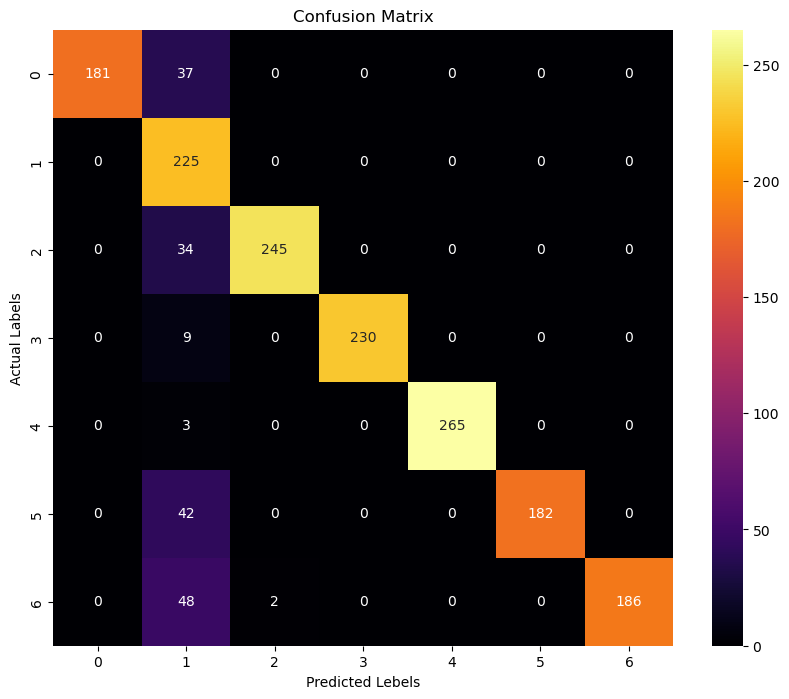

In [704]:
plt.figure(figsize=(10, 8))

sns.heatmap(confM_train_prior, annot=True, fmt="d", cmap="inferno", xticklabels=np.unique(yhattest), yticklabels=np.unique(yhattest))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Lebels")
plt.ylabel("Actual Labels")

plt.show()

In [694]:
confM_train = confusion_matrix(trainMultinli, yhattrain)
confM_train

array([[ 97,  66,  26,  13,   3,   0,  13],
       [  0, 225,   0,   0,   0,   0,   0],
       [  0,  33, 233,   1,  12,   0,   0],
       [  0,   9,   6, 224,   0,   0,   0],
       [  0,   3,   0,   0, 265,   0,   0],
       [  0,  47,  39,   3,   9, 120,   6],
       [  0,  58,  46,   7,   2,   0, 123]], dtype=int64)

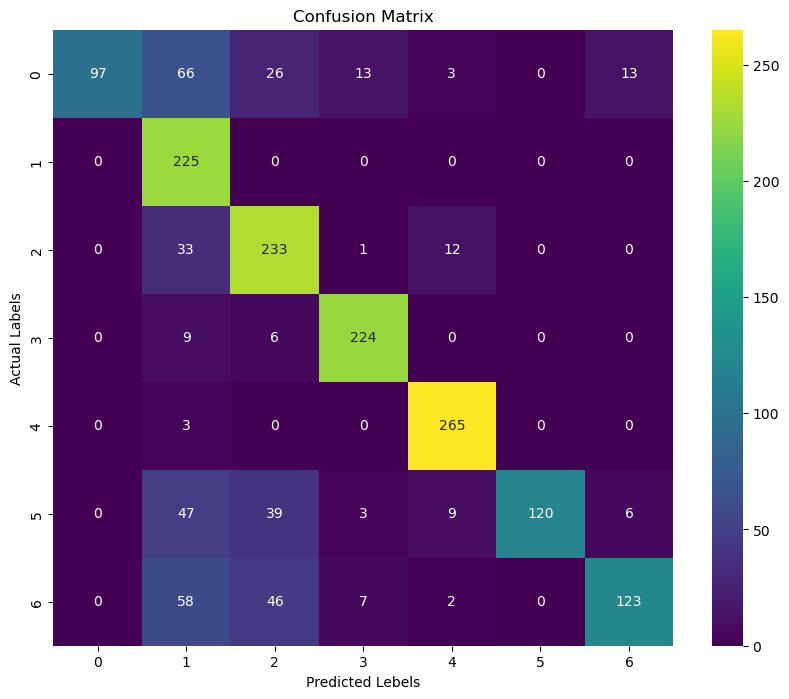

In [695]:
plt.figure(figsize=(10, 8))

sns.heatmap(confM_train, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(yhattest), yticklabels=np.unique(yhattest))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Lebels")
plt.ylabel("Actual Labels")

plt.show()

In [696]:
confM_test_prior = confusion_matrix(testMultinli, yhattest_prior)
confM_test_prior

array([[20, 16,  5,  2,  0, 10,  1],
       [25, 28,  1,  0,  0,  5,  3],
       [ 4,  4, 21,  9,  5, 10, 19],
       [ 0,  3, 12,  6,  0, 16, 21],
       [ 0,  1, 25,  0,  3,  6, 21],
       [ 8, 16, 10,  3,  2, 19,  8],
       [ 5,  3, 12, 12,  1,  6, 15]], dtype=int64)

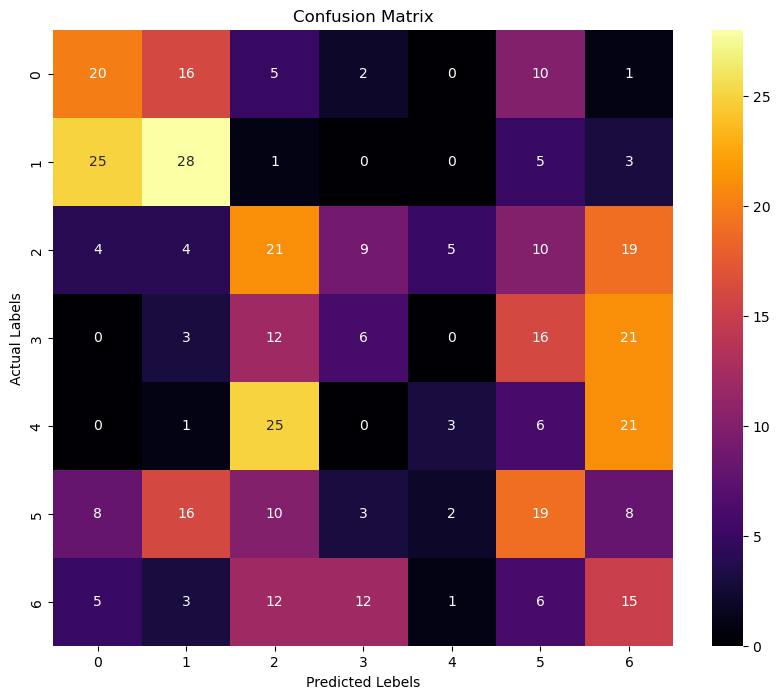

In [705]:
#Create heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(confM_test_prior, annot=True, fmt="d", cmap="inferno", xticklabels=np.unique(yhattest), yticklabels=np.unique(yhattest))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Lebels")
plt.ylabel("Actual Labels")

plt.show()

In [698]:
confM_test = confusion_matrix(testMultinli, yhattest)
confM_test

array([[37,  5,  0, 11,  0,  1,  0],
       [20, 30,  1,  6,  2,  1,  2],
       [ 1,  4, 24, 31,  9,  2,  1],
       [ 0,  1,  8, 48,  0,  1,  0],
       [ 0,  0,  0,  0, 56,  0,  0],
       [ 6, 12, 12, 16,  4, 16,  0],
       [ 0,  2,  9, 32,  2,  1,  8]], dtype=int64)

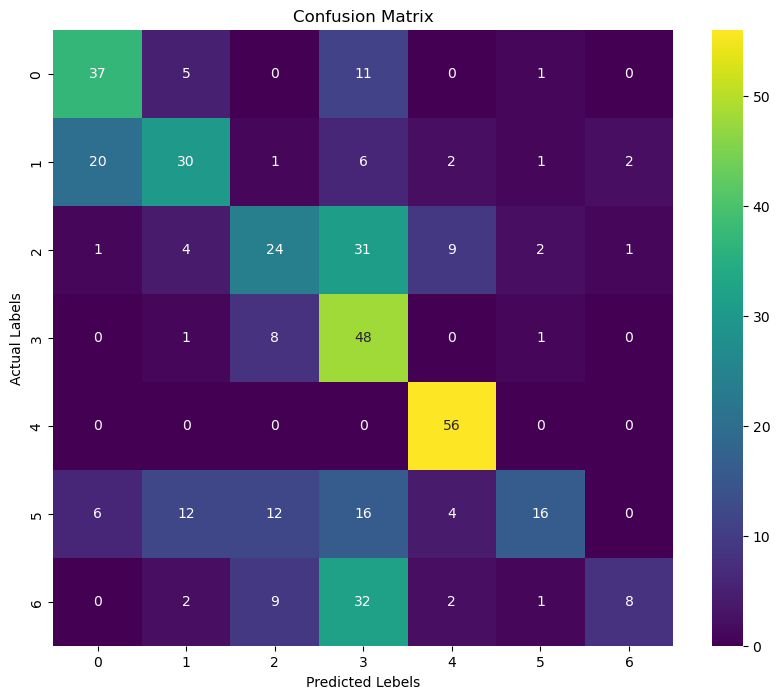

In [699]:
#Create heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(confM_test, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(yhattest), yticklabels=np.unique(yhattest))

plt.title("Confusion Matrix")
plt.xlabel("Predicted Lebels")
plt.ylabel("Actual Labels")

plt.show()

In [701]:
accuracy_score(yhattrain_prior, trainMultinli)

0.896388395500296

In [703]:
accuracy_score(yhattest_prior, testMultinli)

0.26540284360189575

In [ ]:
accurate_rate_train = accuracy_score(trainMultinli, yhattrain)
print("Accuracy: ", accurate_rate_train)

Accuracy:  0.7619893428063943


In [ ]:
accurate_rate_test = accuracy_score(testMultinli, yhattest)
print("Accuracy: ", accurate_rate_test)

Accuracy:  0.518957345971564


In [ ]:
#Calculate False Negative rate
# FNR = FN / (FN + TP)
class_FNR = {}
for i in range(confM_test_prior.shape[0]):
    TP = confM_test_prior[i, i]
    FN = confM_test_prior[i, :].sum() - TP
    FNR = FN / (FN + TP)
    class_FNR[i] = FNR

# Print FNR for each class
for class_id, fnr in class_FNR.items():
    print(f"Class {class_id} - FNR: {fnr}")

Class 0 - FNR: 0.6296296296296297
Class 1 - FNR: 0.5483870967741935
Class 2 - FNR: 0.7083333333333334
Class 3 - FNR: 0.896551724137931
Class 4 - FNR: 0.9464285714285714
Class 5 - FNR: 0.7121212121212122
Class 6 - FNR: 0.7222222222222222


In [ ]:
#Calculate False Negative rate
# FNR = FN / (FN + TP)
class_FNR = {}
for i in range(confM_test.shape[0]):
    TP = confM_test[i, i]
    FN = confM_test[i, :].sum() - TP
    FNR = FN / (FN + TP)
    class_FNR[i] = FNR

# Print FNR for each class
for class_id, fnr in class_FNR.items():
    print(f"Class {class_id} - FNR: {fnr}")

Class 0 - FNR: 0.3148148148148148
Class 1 - FNR: 0.5161290322580645
Class 2 - FNR: 0.6666666666666666
Class 3 - FNR: 0.1724137931034483
Class 4 - FNR: 0.0
Class 5 - FNR: 0.7575757575757576
Class 6 - FNR: 0.8518518518518519


## Conclusion
The first time I made this Naive Bayes model on predicting the obesity level of each person, I got the very high accuracy but the matrix is weird. The previous metrix shows that the diagonal contains very high values while the surrounded area contains zeros which is too perfect! It could be caused from overfitting or data leakage. I noticed that the prior train set's confusion matrix and its accuracy is high, and test set's confusion matrix and its accuracy is pretty low. However, when I run new training set by selecting only columns I interested in, so it turns out that the train set's accuracy is lower and test set's accuracy is higher which is better than before because our model is not too flexible. As discussed from the office hour, I am now understand how to observe the confusion matrix as well as the machine learning purpose and its process. For this dataset, the ideal accuracy should be 1/7 or around 14%. I tried several features selecting on training model and found that the best one, I could do, has accuracy around 52% which is higher than the ideal accuracy :)

### Reference:
Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

### Link:
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
